In [0]:
# comment anything you feel like commeting else notebook gonna be quite long
# in a trail run in which all the nan values and catorigal columns where dropped 
# accuracy was 0.24
# with current cleaning accuracy is 0.28
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [0]:
train = pd.read_excel("https://docs.google.com/spreadsheets/d/15YZ4OmO6HgJK5ZTw_h3il8jRTyWAGDSP/export?format=xlsx&gid=1040194867")

In [0]:
train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [0]:
pd.value_counts(train['Designation'])

Mrs    5423
Mr     5291
Name: Designation, dtype: int64

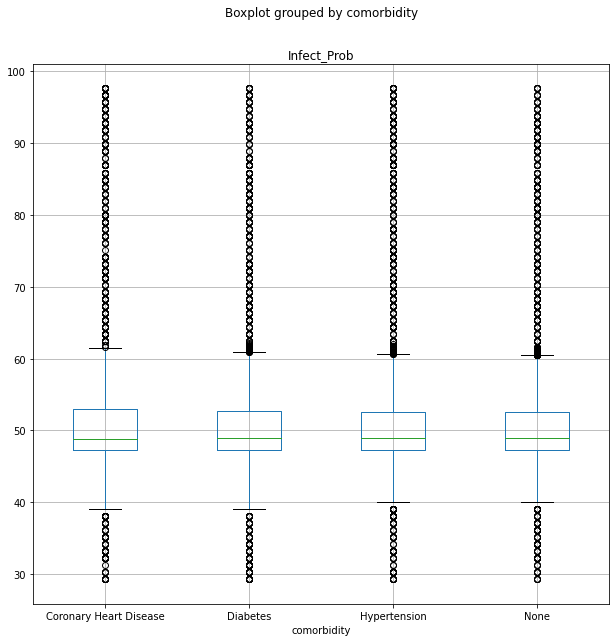

In [0]:
train.boxplot('Infect_Prob', 'comorbidity', figsize=(10,10))

In [0]:
train.shape

(10714, 28)

In [0]:
corr, _ = pearsonr(train['Age'], train ['Infect_Prob'])
print(corr)

-0.33125784177888407


In [0]:
# corr,_ = pearsonr(train['Region'], train['Designation'])

In [0]:
corr, _ = spearmanr(train['Region'], train ['Infect_Prob'])
print(corr)
print(_)

-0.15641595356864382
1.1846219933775162e-59


In [0]:
corr, _ = spearmanr(train['Mode_transport'], train ['Infect_Prob'])
print(corr)
print(_)

nan
nan


In [0]:
corr, _ = pearsonr(train['people_ID'], train ['Infect_Prob'])
print(corr)
print(_)

0.07936129615689885
1.926283551230703e-16


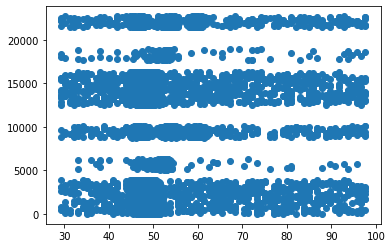

In [0]:
plt.scatter(train['Infect_Prob'], train['people_ID'])

In [0]:
corr, _ = spearmanr(train['cardiological pressure'], train ['Infect_Prob'])
print(corr)
print(_)

nan
nan


In [0]:
corr, _ = spearmanr(train['Mode_transport'], train ['Infect_Prob'])
print(corr)
print(_)

nan
nan


In [0]:
pd.value_counts(train['Deaths/1M'])

0    7681
2    2573
1     460
Name: Deaths/1M, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


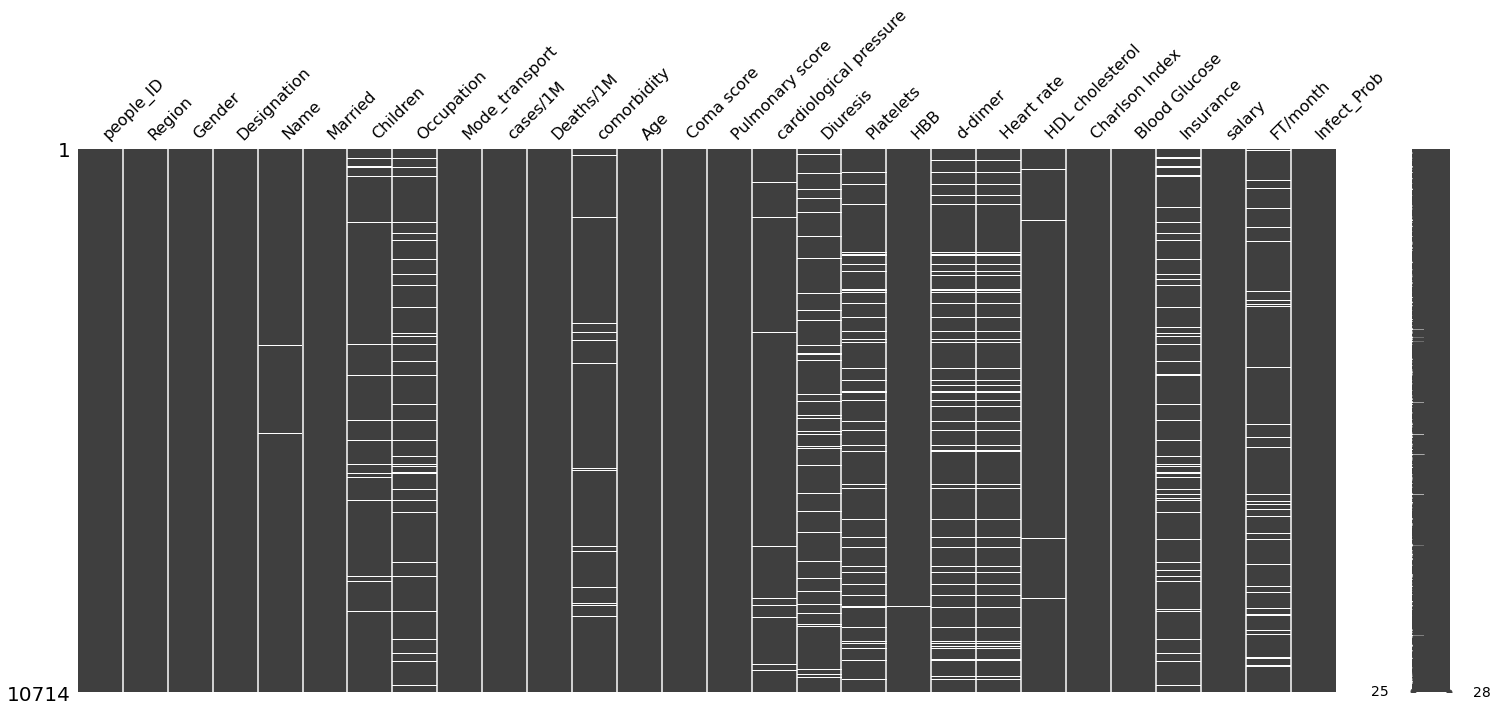

In [0]:
import missingno as msno
msno.matrix(train)

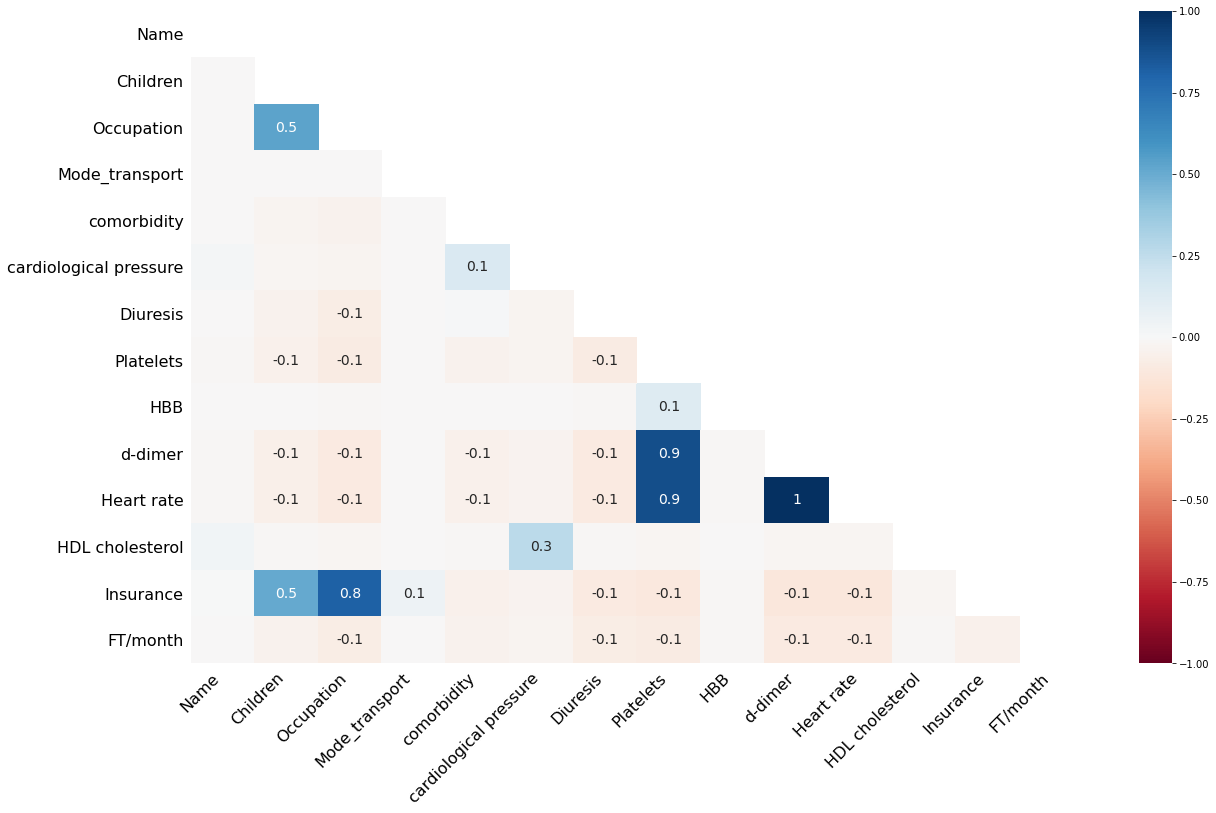

In [0]:
msno.heatmap(train)

In [0]:
train['Married'] = train['Married'].replace('YES', 1)
train['Married'] = train['Married'].replace('NO', 0)


In [0]:
def fillchildren(cols):
  children = cols[0]
  married = cols[1]
  if np.isnan(children):
    if married == 0:
      return 0
    else:
      return children
  else:
    return children
train['Children'] = train[['Children', 'Married']].apply(fillchildren, axis = 1)

In [0]:
train.Children.isna().sum()

0

In [0]:
train.tail()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
10709,22691,Bengaluru,Male,Mr,ashish,0,2.0,Business,Car,8,2,Diabetes,20,14,<400,Normal,134.0,67.0,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,1,0.0,Manufacturing,Car,8,2,None,42,4,<400,Normal,387.0,102.0,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,1,0.0,Clerk,Public,8,2,Diabetes,59,3,<100,Stage-02,177.0,111.0,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,1,1.0,Legal,Walk,8,2,Coronary Heart Disease,49,6,<300,Elevated,352.0,140.0,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565
10713,22695,Bengaluru,Male,Mr,mehboob mehandi,0,2.0,Business,Car,8,2,Diabetes,17,7,<400,Normal,181.0,65.0,134.0,201.0,82.0,60.0,4,3,2100000.0,1400000,0.0,68.342400


In [0]:
train['Platelets'].interpolate(method = 'polynomial', order = 2, inplace = True, direction ='both')

In [0]:
train['Heart rate'].interpolate(method = 'polynomial', order = 2, inplace = True, direction ='both')
train['d-dimer'].interpolate(method = 'polynomial', order = 2, inplace = True, direction ='both')

In [0]:
# FT/month, Insurance, HDL cholesterol, HBB

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


In [0]:
enc_df = pd.DataFrame(enc.fit_transform(train[['Gender']]).toarray())
enc_df.columns = enc.get_feature_names(['Gender'])

In [0]:
train = train.join(enc_df)

In [0]:
train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Gender_Female,Gender_Male
0,1,Bhubaneshwar,Female,Mrs,mansi,1,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,1.0,0.0
1,2,Bhubaneshwar,Female,Mrs,riya masi,1,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,1.0,0.0
2,3,Bhubaneshwar,Female,Mrs,sunita,0,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000,1.0,0.0
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,1,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,1.0,0.0
4,5,Bhubaneshwar,Female,Mrs,champa karketta,0,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800,1.0,0.0


In [0]:
train = train.drop(['Gender','Designation', 'Name'], axis =1)

In [0]:
train.head(10)

,people_ID,Region,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Gender_Female,Gender_Male
0,1,Bhubaneshwar,1,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,1.0,0.0
1,2,Bhubaneshwar,1,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,1.0,0.0
2,3,Bhubaneshwar,0,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000,1.0,0.0
3,4,Bhubaneshwar,1,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,1.0,0.0
4,5,Bhubaneshwar,0,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800,1.0,0.0


In [0]:
train["Occupation"] = train['Occupation'].fillna('Others')

In [0]:
def fillinsurance(cols):
  occ = cols[0]
  ins = cols[1]
  if np.isnan(ins):
    if occ == 'Others':
      return 0
    else:
      return ins
  else:
    return ins

train['Insurance'] = train[['Occupation', 'Insurance']].apply(fillinsurance, axis=1) 

In [0]:
train['Insurance'].interpolate(method = 'polynomial', order = 2, inplace = True, direction ='both')

In [0]:
train.describe()

,people_ID,Married,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Gender_Female,Gender_Male
count,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,10714.000000,10698.000000,10714.000000,10714.000000,10679.000000,10714.000000,10714.000000,1.071400e+04,1.071400e+04,9991.000000,10714.000000,10714.000000,10714.000000
mean,10084.893784,0.791581,1.031921,3.285888,0.523241,42.083722,9.013067,278.806261,87.904723,116.170967,275.158928,74.743515,52.632737,20.028094,5.015027,2.453690e+06,1.304713e+06,1.004604,52.280680,0.506160,0.493840
std,7108.663645,0.406197,0.825766,2.721274,0.854303,15.323397,3.714970,97.985526,42.356553,55.178811,44.238116,15.127063,10.434293,11.828445,1.399770,1.502466e+06,6.075947e+05,0.815257,10.674667,0.499985,0.499985
min,1.000000,0.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,-49.318573,20.000000,120.949780,25.964334,35.000000,0.000000,3.000000,-1.916144e+06,3.000000e+05,0.000000,29.289600,0.000000,0.000000
25%,2679.250000,1.000000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.200000e+06,8.000000e+05,0.000000,47.277426,0.000000,0.000000
50%,10003.500000,1.000000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,275.291457,75.000000,53.000000,20.000000,5.000000,2.500000e+06,1.300000e+06,1.000000,49.008389,1.000000,0.000000
75%,15141.750000,1.000000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,312.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313,1.000000,1.000000
max,22695.000000,1.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,216.189583,210.000000,454.737206,123.982587,70.000000,40.000000,7.000000,6.480210e+06,2.300000e+06,2.000000,97.632000,1.000000,1.000000


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
train['Occupation'] = le.fit_transform(train['Occupation'])

In [0]:
train.head()

,people_ID,Region,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Gender_Female,Gender_Male
0,1,Bhubaneshwar,1,1.0,4,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,1.0,0.0
1,2,Bhubaneshwar,1,2.0,4,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,1.0,0.0
2,3,Bhubaneshwar,0,1.0,1,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000,1.0,0.0
3,4,Bhubaneshwar,1,1.0,3,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,1.0,0.0
4,5,Bhubaneshwar,0,2.0,6,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800,1.0,0.0


In [0]:
train['Pulmonary score'].unique()

array(['<400', '<100', '<300', '<200'], dtype=object)

In [0]:
train['Pulmonary score'] = train['Pulmonary score'].replace('<400', 400)
train['Pulmonary score'] = train['Pulmonary score'].replace('<300', 300)
train['Pulmonary score'] = train['Pulmonary score'].replace('<200', 200)
train['Pulmonary score'] = train['Pulmonary score'].replace('<100', 100)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  object 
 2   Married                 10714 non-null  int64  
 3   Children                10714 non-null  float64
 4   Occupation              10714 non-null  int64  
 5   Mode_transport          10711 non-null  object 
 6   cases/1M                10714 non-null  int64  
 7   Deaths/1M               10714 non-null  int64  
 8   comorbidity             10488 non-null  object 
 9   Age                     10714 non-null  int64  
 10  Coma score              10714 non-null  int64  
 11  Pulmonary score         10714 non-null  int64  
 12  cardiological pressure  10617 non-null  object 
 13  Diuresis                9998 non-null   float64
 14  Platelets               10714 non-null

In [0]:
try_train = train.drop(['Region', 'Mode_transport', 'cardiological pressure', 'comorbidity'], axis = 1)

In [0]:
try_train = try_train.dropna()

In [0]:
try_train.shape

(9224, 23)

In [0]:
x = try_train.drop(['Infect_Prob'], axis =1).values

In [0]:
y = try_train['Infect_Prob'].values

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [0]:
reg = LinearRegression()

In [0]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = reg.predict(x_test)

In [0]:
mean_squared_error(y_test, y_pred)

89.39465214576023

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2816332311398301

In [0]:
from sklearn.tree import DecisionTreeRegressor 

In [0]:
regressor = DecisionTreeRegressor(random_state = 0)

In [0]:
train.head()

,people_ID,Region,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,Gender_Female,Gender_Male
0,1,Bhubaneshwar,1,1.0,4,Public,2,0,Hypertension,68,8,400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,1.0,0.0
1,2,Bhubaneshwar,1,2.0,4,Walk,2,0,Diabetes,64,15,100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,1.0,0.0
2,3,Bhubaneshwar,0,1.0,1,Public,2,0,None,19,13,300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000,1.0,0.0
3,4,Bhubaneshwar,1,1.0,3,Car,2,0,Coronary Heart Disease,33,9,200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,1.0,0.0
4,5,Bhubaneshwar,0,2.0,6,Car,2,0,Diabetes,23,7,400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800,1.0,0.0


In [0]:
#train.info()

In [0]:
train.shape

(10714, 27)

In [0]:
# train = train.dropna()

In [0]:
# train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8957 entries, 0 to 10713
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               8957 non-null   int64  
 1   Region                  8957 non-null   object 
 2   Married                 8957 non-null   int64  
 3   Children                8957 non-null   float64
 4   Occupation              8957 non-null   int64  
 5   Mode_transport          8957 non-null   object 
 6   cases/1M                8957 non-null   int64  
 7   Deaths/1M               8957 non-null   int64  
 8   comorbidity             8957 non-null   object 
 9   Age                     8957 non-null   int64  
 10  Coma score              8957 non-null   int64  
 11  Pulmonary score         8957 non-null   int64  
 12  cardiological pressure  8957 non-null   object 
 13  Diuresis                8957 non-null   float64
 14  Platelets               8957 non-null  

In [0]:
#train = train.drop(['Mode_transport', 'comorbidity', 'cardiological pressure', 'Region'], axis = 1)

In [0]:
#train.head()

In [0]:
a = train[(train['Occupation'] == 'Others')]
a['Insurance']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: Insurance, dtype: float64)